In [2]:
import geopandas as gpd 
import leafmap 
import pandas as pd


In [3]:
gdf = gpd.read_file("../plan_uso_de_terreno")

In [ ]:
#Columns
# TIPO - npi
# Municipio - duh
# CLASIPUT - clasificacion abreviada
# DESCRIPUT - descripcion de la clasificacion
# RPUT - Una fecha de metadata
# V_PIT - Otra fecha de metadata
# Shape_Leng - 
# Shape_Area
# geometry

In [15]:
gdf.columns, len(gdf.columns)

(Index(['OBJECTID', 'TIPO', 'Municipio', 'CLASIPUT', 'DESCRIPPUT', 'R_PUT',
        'V_PUT', 'Shape_Leng', 'Shape_Area', 'geometry'],
       dtype='object'),
 10)

In [57]:
gdf.groupby("CLASIPUT").apply(lambda x: x["Shape_Area"].sum()).sort_values()

CLASIPUT
SREP-AP    6.957529e+06
SURNP      2.699181e+07
SREP-EA    2.944419e+07
SURP       4.169554e+07
SREP-P     4.433852e+07
SREP-AE    5.341982e+07
SREP-H     6.965070e+07
AGUA       1.027680e+08
SREP       1.107285e+08
SREP-AH    1.161952e+08
SREP-EP    1.942787e+08
VIAL       3.649682e+08
SREP-EH    6.112035e+08
SU         1.190638e+09
SRC        1.789114e+09
SREP-E     1.795066e+09
SREP-A     2.329418e+09
dtype: float64

In [60]:
filtered_gdf = gdf[gdf["CLASIPUT"] == "SREP-E"]
filtered_gdf["Municipio"].value_counts()
# gdf[["Municipio", "CLASIPUT"]].value_counts()

Aguadilla       3
Juana DÃ­az     3
Santa Isabel    2
Cayey           2
Vieques         2
               ..
Humacao         1
Jayuya          1
Juncos          1
Lares           1
Yauco           1
Name: Municipio, Length: 78, dtype: int64

In [61]:
import leafmap 

m = leafmap.Map()
m.add_gdf(filtered_gdf)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [4]:
gdf["TIPO"].value_counts()

P    748
V    121
A    103
D     17
C      6
p      1
Name: TIPO, dtype: int64

In [5]:
gdf["CLASIPUT"].unique()

array(['AGUA', 'SREP-E', 'SU', 'SRC', 'SREP', 'SREP-H', 'SREP-EH',
       'SREP-A', 'VIAL', 'SREP-AE', 'SREP-AH', 'SREP-EA', 'SREP-EP',
       'SURNP', 'SURP', 'SREP-AP', 'SREP-P'], dtype=object)

In [1]:
gdf['CLASIPPUT'].value_counts()

NameError: name 'gdf' is not defined

In [ ]:
gdf['Shape_Leng']

0      1.311709e+05
1      7.838277e+04
2      2.626402e+04
3      1.480070e+02
4      4.420209e+04
           ...     
991    7.131730e+03
992    5.274282e+05
993    4.123878e+05
994    9.115478e+05
995    1.089548e+06
Name: Shape_Leng, Length: 996, dtype: float64

In [ ]:
gdf["Shape_Area"]

0      1.442777e+06
1      2.969430e+05
2      7.279752e+04
3      3.307790e+02
4      2.885545e+05
           ...     
991    1.615170e+05
992    2.446647e+06
993    2.138055e+06
994    4.278837e+06
995    4.987377e+06
Name: Shape_Area, Length: 996, dtype: float64

In [ ]:
gdf["geometry"]

0      MULTIPOLYGON (((168862.326 232956.220, 168861....
1      MULTIPOLYGON (((125676.402 254066.689, 125665....
2      MULTIPOLYGON (((125575.710 261377.380, 125577....
3      POLYGON ((123048.177 264069.789, 123047.301 26...
4      MULTIPOLYGON (((230973.211 240378.351, 230970....
                             ...                        
991    MULTIPOLYGON (((306661.925 229231.559, 306661....
992    MULTIPOLYGON (((304406.134 229648.746, 304437....
993    MULTIPOLYGON (((191607.091 228359.393, 191612....
994    MULTIPOLYGON (((261820.398 220963.270, 261823....
995    MULTIPOLYGON (((154928.074 213939.942, 154930....
Name: geometry, Length: 996, dtype: geometry

In [16]:
poly_gdf = gdf[gdf["geometry"].apply(lambda geom : True if geom.type != "MultiPolygon" else False)]
multi_poly_gdf = gdf[gdf["geometry"].apply(lambda geom : True if geom.type == "MultiPolygon" else False)]
poly_gdf

,OBJECTID,TIPO,Municipio,CLASIPUT,DESCRIPPUT,R_PUT,V_PUT,Shape_Leng,Shape_Area,geometry
3,4,A,Aguadilla,SREP-E,Suelo RÃºstico Especialmente Protegido EcolÃ³gico,PUT-2014,30-NOV-2015,148.007004,330.778963,"POLYGON ((123048.177 264069.789, 123047.301 26..."
8,9,A,Arecibo,SU,Suelo Urbano,PUT-2014,30-NOV-2015,565.020399,2315.744735,"POLYGON ((165105.627 271844.343, 165104.163 27..."
14,15,A,BayamÃ³n,SREP-E,Suelo RÃºstico Especialmente Protegido EcolÃ³gico,PUT-2014,30-NOV-2015,390.883473,2386.139937,"POLYGON ((225818.853 250896.717, 225811.770 25..."
20,21,A,Carolina,SRC,Suelo RÃºstico ComÃºn,PUT-2014,30-NOV-2015,306.619411,4714.597004,"POLYGON ((253651.639 249718.850, 253648.780 24..."
35,36,A,Guayanabo,AGUA,Agua,PUT-2014,30-NOV-2015,226.459994,1108.275542,"POLYGON ((233504.382 267124.082, 233522.812 26..."
...,...,...,...,...,...,...,...,...,...,...
960,961,V,Orocovis,SREP-A,Suelo RÃºstico Especialmente Protegido AgrÃ­cola,PUT-2014,30-NOV-2015,685.302172,3892.407873,"POLYGON ((208549.901 244656.128, 208546.408 24..."
964,965,V,Ponce,SU,Suelo Urbano,PUT-2014,30-NOV-2015,1982.687401,53561.869862,"POLYGON ((178408.038 218128.897, 178407.408 21..."
981,982,V,Toa Alta,SU,Suelo Urbano,PUT-2014,30-NOV-2015,132.376181,681.770239,"POLYGON ((222213.222 262170.088, 222213.571 26..."
986,987,V,Utuado,SREP-AE,Suelo RÃºstico Especialmente Protegido AgrÃ­co...,PUT-2014,30-NOV-2015,1476.822719,6593.167561,"POLYGON ((174691.250 242740.632, 174692.673 24..."


In [17]:
multi_poly_gdf

,OBJECTID,TIPO,Municipio,CLASIPUT,DESCRIPPUT,R_PUT,V_PUT,Shape_Leng,Shape_Area,geometry
0,1,A,Adjuntas,AGUA,Agua,PUT-2014,30-NOV-2015,1.311709e+05,1.442777e+06,"MULTIPOLYGON (((168862.326 232956.220, 168861...."
1,2,A,Aguada,AGUA,Agua,PUT-2014,30-NOV-2015,7.838277e+04,2.969430e+05,"MULTIPOLYGON (((125676.402 254066.689, 125665...."
2,3,A,Aguadilla,AGUA,Agua,PUT-2014,30-NOV-2015,2.626402e+04,7.279752e+04,"MULTIPOLYGON (((125575.710 261377.380, 125577...."
4,5,A,Aguas Buenas,AGUA,Agua,PUT-2014,30-NOV-2015,4.420209e+04,2.885545e+05,"MULTIPOLYGON (((230973.211 240378.351, 230970...."
5,6,A,Aibonito,AGUA,Agua,PUT-2014,30-NOV-2015,7.203641e+04,4.172122e+05,"MULTIPOLYGON (((217708.800 227907.051, 217712...."
...,...,...,...,...,...,...,...,...,...,...
991,992,V,Vieques,SREP-E,Suelo RÃºstico Especialmente Protegido EcolÃ³gico,PUT-2014,30-NOV-2015,7.131730e+03,1.615170e+05,"MULTIPOLYGON (((306661.925 229231.559, 306661...."
992,993,V,Vieques,VIAL,Vial,PUT-2014,30-NOV-2015,5.274282e+05,2.446647e+06,"MULTIPOLYGON (((304406.134 229648.746, 304437...."
993,994,V,Villalba,VIAL,Vial,PUT-2014,30-NOV-2015,4.123878e+05,2.138055e+06,"MULTIPOLYGON (((191607.091 228359.393, 191612...."
994,995,V,Yabucoa,VIAL,Vial,PUT-2014,30-NOV-2015,9.115478e+05,4.278837e+06,"MULTIPOLYGON (((261820.398 220963.270, 261823...."


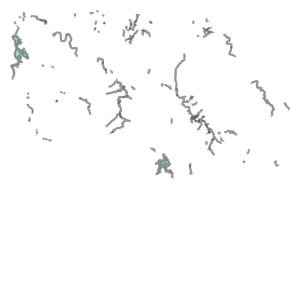

In [5]:
multi_poly_gdf.iloc[0]["geometry"]

In [ ]:
import leafmap 

m = leafmap.Map()
m.add_gdf(multi_poly_gdf.iloc[0:2])
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [25]:
gdfs = []
for row in multi_poly_gdf.iterrows():

    index = row[0]
    row_data = row[1]

    geometry = row_data["geometry"]

    poly_rows = []
    for poly in geometry.geoms:
        new_row = row_data.copy()
        new_row["geometry"] = poly
        # print(row_data)
        poly_rows.append(new_row)
        # break 
        # gdf = gpd.DataFrame()
    # break 
    g = gpd.GeoDataFrame(pd.DataFrame(poly_rows), crs=6566)
    gdfs.append(g)
    # break 
        # create row from this polygon

    # break
clean_gdf = gpd.GeoDataFrame(pd.concat(gdfs), crs=6566)
clean_gdf

,OBJECTID,TIPO,Municipio,CLASIPUT,DESCRIPPUT,R_PUT,V_PUT,Shape_Leng,Shape_Area,geometry
0,1,A,Adjuntas,AGUA,Agua,PUT-2014,30-NOV-2015,1.311709e+05,1.442777e+06,"POLYGON ((168862.326 232956.220, 168861.965 23..."
0,1,A,Adjuntas,AGUA,Agua,PUT-2014,30-NOV-2015,1.311709e+05,1.442777e+06,"POLYGON ((168791.838 233400.461, 168791.147 23..."
0,1,A,Adjuntas,AGUA,Agua,PUT-2014,30-NOV-2015,1.311709e+05,1.442777e+06,"POLYGON ((172283.599 233685.514, 172284.923 23..."
0,1,A,Adjuntas,AGUA,Agua,PUT-2014,30-NOV-2015,1.311709e+05,1.442777e+06,"POLYGON ((174313.431 233681.761, 174312.105 23..."
0,1,A,Adjuntas,AGUA,Agua,PUT-2014,30-NOV-2015,1.311709e+05,1.442777e+06,"POLYGON ((167111.296 234158.429, 167112.597 23..."
...,...,...,...,...,...,...,...,...,...,...
995,996,V,Yauco,VIAL,Vial,PUT-2014,30-NOV-2015,1.089548e+06,4.987377e+06,"POLYGON ((156616.417 220548.679, 156619.186 22..."
995,996,V,Yauco,VIAL,Vial,PUT-2014,30-NOV-2015,1.089548e+06,4.987377e+06,"POLYGON ((155919.338 221254.554, 155913.796 22..."
995,996,V,Yauco,VIAL,Vial,PUT-2014,30-NOV-2015,1.089548e+06,4.987377e+06,"POLYGON ((156029.351 221486.130, 156042.339 22..."
995,996,V,Yauco,VIAL,Vial,PUT-2014,30-NOV-2015,1.089548e+06,4.987377e+06,"POLYGON ((157891.602 226532.651, 157897.188 22..."


In [49]:
clean_gdf.iloc[0:50000].to_file("../plan_uso_terreno_clean_1")

In [50]:
clean_gdf.iloc[50000:-1].to_file("../plan_uso_terreno_clean_2")

RuntimeError: GDAL Error: Failed to write shape object. The maximum file size of 4294148692 has been reached. The current record of size 1538940 cannot be added.. Failed to write record: <fiona.model.Feature object at 0x7fec9393dac0>

In [26]:
import os 

chunk_size = 5000
for i in range(0,len(clean_gdf.index), chunk_size):
    print(i, i + chunk_size)
    try :
        os.mkdir(f"../plan_de_uso/chunk-{i}-{i +chunk_size}")
    except: 
        pass
    clean_gdf.iloc[i: i + chunk_size].to_file(f"../plan_de_uso/chunk-{i}-{i + chunk_size}")
    # .to_file(f"../plan_de_uso/chunk-{i*5000}-{(i + 1)*5000}")
    # break 

0 5000
5000 10000
10000 15000
15000 20000
20000 25000
25000 30000
30000 35000
35000 40000
40000 45000
45000 50000
50000 55000
55000 60000
60000 65000
65000 70000
70000 75000
75000 80000
80000 85000
85000 90000
90000 95000


In [30]:
aaa = gpd.read_file("../plan_de_uso/chunk-0-5000/")

,OBJECTID,TIPO,Municipio,CLASIPUT,DESCRIPPUT,R_PUT,V_PUT,Shape_Leng,Shape_Area,geometry
0,958,V,Naguabo,VIAL,Vial,PUT-2014,30-NOV-2015,6.648859e+05,4.040591e+06,"POLYGON ((268426.647 243085.826, 268424.738 24..."
1,958,V,Naguabo,VIAL,Vial,PUT-2014,30-NOV-2015,6.648859e+05,4.040591e+06,"POLYGON ((265815.200 243122.521, 265806.356 24..."
2,958,V,Naguabo,VIAL,Vial,PUT-2014,30-NOV-2015,6.648859e+05,4.040591e+06,"POLYGON ((272428.026 243265.465, 272424.414 24..."
3,958,V,Naguabo,VIAL,Vial,PUT-2014,30-NOV-2015,6.648859e+05,4.040591e+06,"POLYGON ((269673.543 243276.837, 269665.550 24..."
4,958,V,Naguabo,VIAL,Vial,PUT-2014,30-NOV-2015,6.648859e+05,4.040591e+06,"POLYGON ((276551.872 243086.792, 276543.176 24..."
...,...,...,...,...,...,...,...,...,...,...
1706,996,V,Yauco,VIAL,Vial,PUT-2014,30-NOV-2015,1.089548e+06,4.987377e+06,"POLYGON ((156616.417 220548.679, 156619.186 22..."
1707,996,V,Yauco,VIAL,Vial,PUT-2014,30-NOV-2015,1.089548e+06,4.987377e+06,"POLYGON ((155919.338 221254.554, 155913.796 22..."
1708,996,V,Yauco,VIAL,Vial,PUT-2014,30-NOV-2015,1.089548e+06,4.987377e+06,"POLYGON ((156029.351 221486.130, 156042.339 22..."
1709,996,V,Yauco,VIAL,Vial,PUT-2014,30-NOV-2015,1.089548e+06,4.987377e+06,"POLYGON ((157891.602 226532.651, 157897.188 22..."


In [31]:
import leafmap 

m = leafmap.Map()
m.add_gdf(aaa)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…